Created by: 

Date: 2024-12-11

Latest change when and what:

Notes:

# 3. Model selection

Trying different models, from baseline to advanced and comparing their outcomes.

In [1]:
# importing packages
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
# loading train, test and validation datasets

# reloading the datasets
train_data = pd.read_csv("../2_preprocessing/train.csv")
test_data = pd.read_csv("../2_preprocessing/test.csv")
val_data = pd.read_csv('../2_preprocessing/validation.csv')

In [26]:
len(train_data['script'][9])

129417

In [ ]:
average_characters = train_data['script'].apply(len).mean()
average_characters = round(average_characters,0)

print(f"Average number of characters: {average_characters}")

Average number of characters: 124482.0


## 3.1 Bag of Words (BoW)

In [4]:
texts_train = train_data["script"].tolist()

In [33]:
# make vectorizer
vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(texts_train) # only for training!

In [10]:
# sanity check
print(features_train.shape)
print(len(vectorizer.vocabulary_))
vectorizer.vocabulary_

(1424, 339795)
339795


{'dog': 92896,
 'day': 83665,
 'afternoon': 21469,
 'by': 56614,
 'frank': 121429,
 'pierson': 228857,
 'final': 115671,
 'draft': 95359,
 'fade': 111051,
 'in': 155149,
 'ext': 109699,
 'electric': 101817,
 'sign': 269748,
 'it': 160685,
 'fills': 115563,
 'the': 296809,
 'screen': 261012,
 'designed': 87427,
 'to': 302984,
 'exactly': 108452,
 'fill': 115526,
 'frame': 121289,
 'size': 271482,
 'of': 212908,
 'whatever': 326971,
 'ratio': 243485,
 'were': 326213,
 'shooting': 267913,
 'says': 258916,
 '251': 7146,
 'this': 299168,
 'message': 192238,
 'will': 329281,
 'be': 41722,
 'little': 180011,
 'cryptic': 79915,
 'movie': 200756,
 'audience': 35410,
 'on': 215301,
 'an': 27022,
 'essentially': 106770,
 'black': 46865,
 'hold': 147067,
 'for': 119680,
 'beat': 42005,
 'then': 297519,
 'changes': 63814,
 'lights': 178729,
 'flash': 117358,
 'which': 327584,
 'should': 268280,
 'explain': 109414,
 'everyone': 108036,
 '94': 15674,
 'and': 27297,
 'slow': 273236,
 'distant': 91548,

In [7]:
# getting labels
y_train = train_data.passed_bechdel.tolist()

In [35]:
# initializing and fitting model to train data
clf = LogisticRegression(random_state=42)
clf.fit(features_train, y_train)

/home/ucloud/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [36]:
clf.score(features_train, y_train)

0.9964887640449438

In [37]:
# testing on new data
#data_new_subset = data.iloc[90:100]
texts_test = test_data['script'].tolist()
features_test = vectorizer.transform(texts_test)
y_test = test_data['passed_bechdel'].tolist()
clf.score(features_test, y_test)

0.7262569832402235

#### Bag of Words - neater code

In [87]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
# getting data

# train data 
texts_train = train_data["script"].to_list()
y_train = train_data.passed_bechdel.to_list()

# create frequency matrix of words
vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(texts_train) # only for training!

# validation data 
texts_val = val_data["script"].to_list()
y_val = val_data.passed_bechdel.to_list()

# plot the words in the validation dataset in the matrix made on the training data 
features_val = vectorizer.transform(texts_val)

# test (ignore!!)
texts_test = test_data["script"].to_list()
y_test = test_data.passed_bechdel.to_list()
features_test = vectorizer.transform(texts_test) # only for training!

# fit = train - laver matrix med vocabulary 
# transform = counter hvor mange gange hvert ord optræder
# kan være ord, der ikke er i train 

In [44]:
clf = LogisticRegression(random_state=42).fit(features_train, y_train)

/home/ucloud/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
performances = []

In [105]:

for x, y, nsplit in zip([features_train, features_val, features_test],
                        [y_train, y_val, y_test],
                        ['train', 'val', 'test']):
    mean_accuracy_score = clf.score(x, y) # mean?
    preds = clf.predict(x)
    f1 = f1_score(y, preds)
    #r2 = r2_score(y, preds)
    #precision = average_precision_score(y, preds)
    #performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': 'BoW_log_reg',
                        'split': nsplit,
                        #'rmse': round(performance,4),
                       # 'r2': round(r2,4),
                        'mean_acc_score': round(mean_accuracy_score,4),
                        #'precision': round(precision,4),
                        'f1_score': round(f1,4)})

performances

[{'model': 'BoW_log_reg',
  'split': 'train',
  'mean_acc_score': 0.9965,
  'f1_score': 0.9964},
 {'model': 'BoW_log_reg',
  'split': 'val',
  'mean_acc_score': 0.6742,
  'f1_score': 0.6667},
 {'model': 'BoW_log_reg',
  'split': 'test',
  'mean_acc_score': 0.7263,
  'f1_score': 0.738}]

In [ ]:
clf.n_iter_ # 100 iterations? 

array([100], dtype=int32)

In [ ]:
# kig på de rigtige metrics! overvej hvilke jeg skal implementere
# tilføj confusion matrix metrics i stedet for R2 evt 
# precision, recall, eller bare F1 
# fjern test!! 

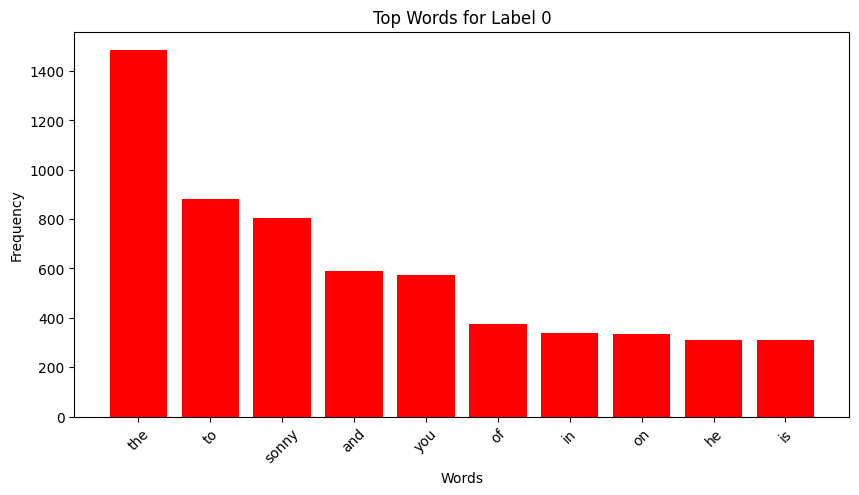

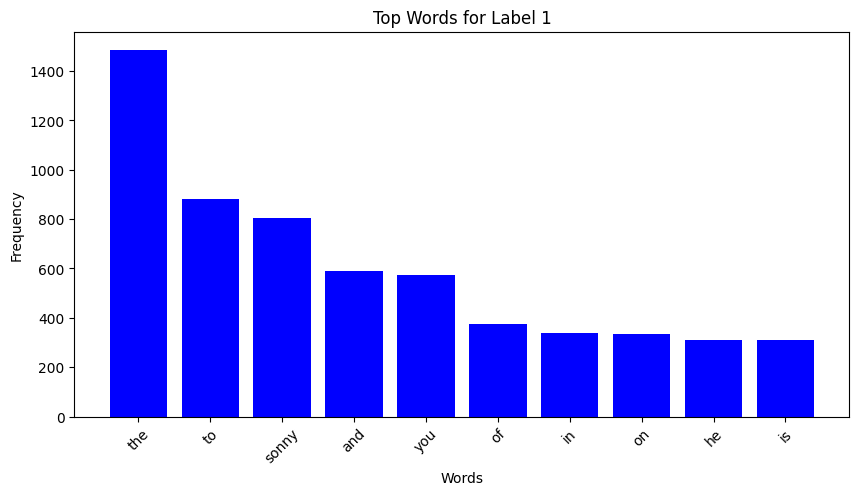

In [ ]:
# Get the vocabulary mapping (word to column index)
vocabulary = vectorizer.vocabulary_
words = np.array(list(vocabulary.keys()))
word_indices = np.array(list(vocabulary.values()))

# Separate the word frequencies by label
X_label_0 = features_train[y_train == 0].toarray().sum(axis=0)  # Word frequencies for label 0
X_label_1 = features_train[y_train == 1].toarray().sum(axis=0)  # Word frequencies for label 1


# Get the top 10 words for label 0
top_indices_label_0 = np.argsort(X_label_0)[-10:][::-1]  # Indices of top words
top_words_label_0 = words[word_indices.argsort()][top_indices_label_0]
top_frequencies_label_0 = X_label_0[top_indices_label_0]

# Get the top 10 words for label 1
top_indices_label_1 = np.argsort(X_label_1)[-10:][::-1]  # Indices of top words
top_words_label_1 = words[word_indices.argsort()][top_indices_label_1]
top_frequencies_label_1 = X_label_1[top_indices_label_1]

# Plot for label 0
plt.figure(figsize=(10, 5))
plt.bar(top_words_label_0, top_frequencies_label_0, color='red')
plt.title("Top Words for Label 0")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Plot for label 1
plt.figure(figsize=(10, 5))
plt.bar(top_words_label_1, top_frequencies_label_1, color='blue')
plt.title("Top Words for Label 1")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [96]:
frequency_diff

array([0, 0, 0, ..., 0, 0, 0], shape=(339795,))

np.int64(0)

/home/ucloud/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4746 (\N{ETHIOPIC SYLLABLE XWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


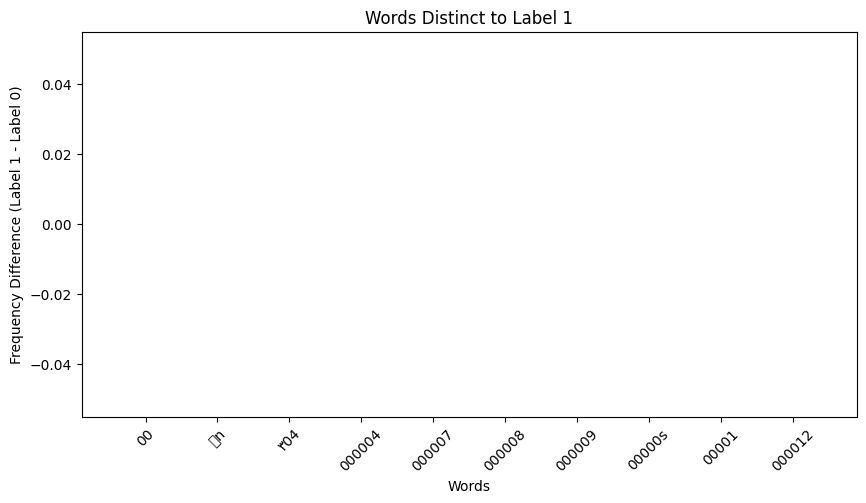

/home/ucloud/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1947 (\N{THAANA LETTER THAALU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


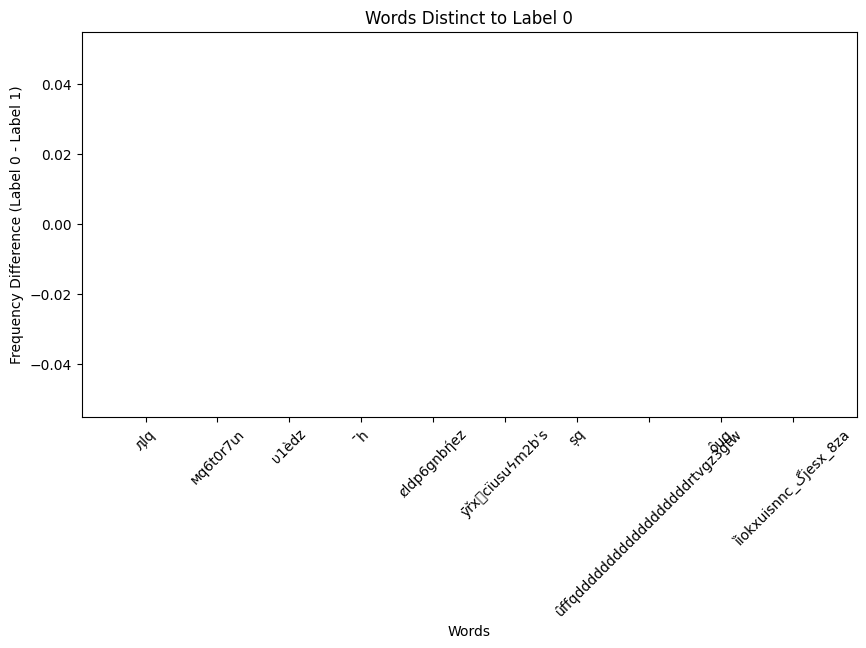

In [95]:
# plotting words which are different


# Get the vocabulary mapping (word to column index)
vocabulary = vectorizer.vocabulary_
words = np.array(list(vocabulary.keys()))
word_indices = np.array(list(vocabulary.values()))

# Separate the word frequencies by label
X_label_0 = features_train[y_train == 0].toarray().sum(axis=0)  # Word frequencies for label 0
X_label_1 = features_train[y_train == 1].toarray().sum(axis=0)  # Word frequencies for label 1

# Calculate the difference in frequencies between label 1 and label 0
frequency_diff = X_label_1 - X_label_0

# Find the top 10 words with the largest positive difference (distinct for label 1)
top_indices_distinct_label_1 = np.argsort(frequency_diff)[-10:][::-1]  # Largest positive differences
distinct_words_label_1 = words[word_indices.argsort()][top_indices_distinct_label_1]
distinct_frequencies_label_1 = frequency_diff[top_indices_distinct_label_1]

# Plot the distinct words for label 1
plt.figure(figsize=(10, 5))
plt.bar(distinct_words_label_1, distinct_frequencies_label_1, color='blue')
plt.title("Words Distinct to Label 1")
plt.xlabel("Words")
plt.ylabel("Frequency Difference (Label 1 - Label 0)")
plt.xticks(rotation=45)
plt.show()

# (Optional) Repeat for words distinct to label 0
top_indices_distinct_label_0 = np.argsort(frequency_diff)[:10]  # Largest negative differences
distinct_words_label_0 = words[word_indices.argsort()][top_indices_distinct_label_0]
distinct_frequencies_label_0 = frequency_diff[top_indices_distinct_label_0]

# Plot the distinct words for label 0
plt.figure(figsize=(10, 5))
plt.bar(distinct_words_label_0, -distinct_frequencies_label_0, color='red')  # Flip sign for better visualization
plt.title("Words Distinct to Label 0")
plt.xlabel("Words")
plt.ylabel("Frequency Difference (Label 0 - Label 1)")
plt.xticks(rotation=45)
plt.show()


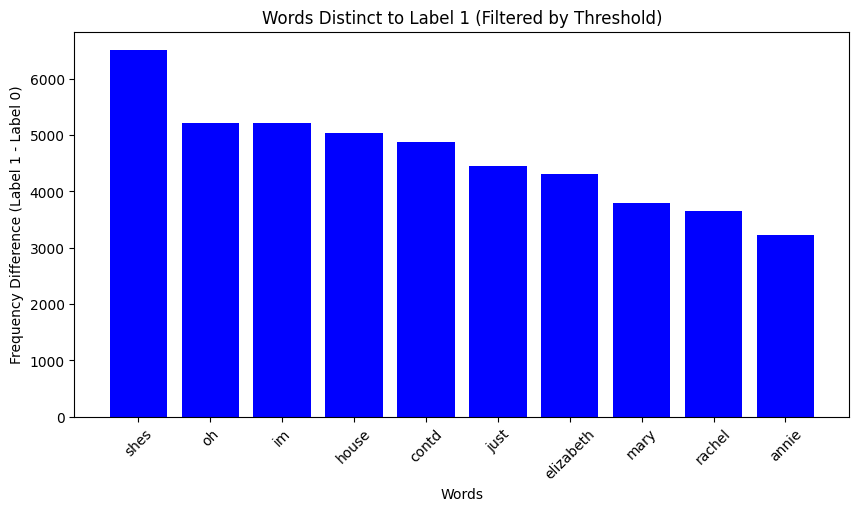

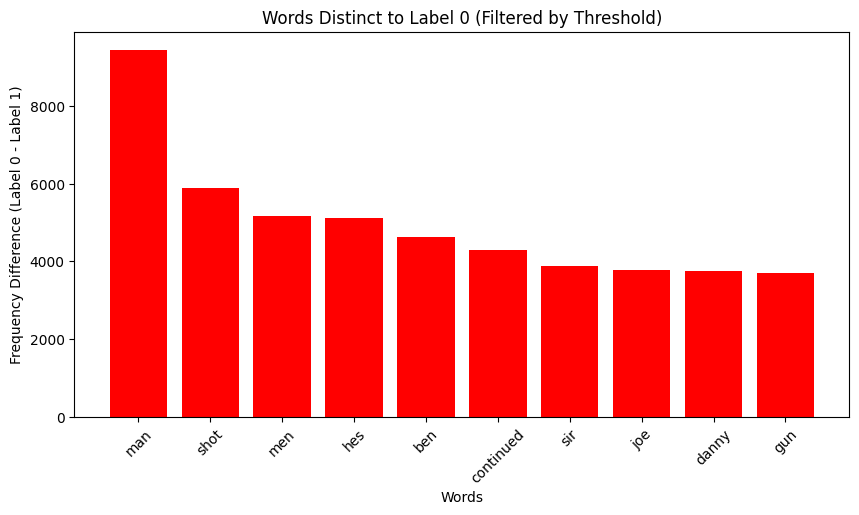

In [111]:


# Example text data and labels
texts = train_data['script']
labels = train_data['passed_bechdel']

# Initialize and fit the CountVectorizer with stopwords removal
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)  # Sparse matrix of word counts

# Get the vocabulary mapping (word to column index)
vocabulary = vectorizer.vocabulary_
words = np.array(list(vocabulary.keys()))
word_indices = np.array(list(vocabulary.values()))

# Separate the word frequencies by label
X_label_0 = X[labels == 0].toarray().sum(axis=0)  # Word frequencies for label 0
X_label_1 = X[labels == 1].toarray().sum(axis=0)  # Word frequencies for label 1

# Calculate the difference in frequencies between label 1 and label 0
frequency_diff = X_label_1 - X_label_0

# Apply threshold filtering: Keep words with |frequency_diff| >= 2
threshold = 2
valid_indices = np.where(np.abs(frequency_diff) >= threshold)[0]
filtered_frequency_diff = frequency_diff[valid_indices]
filtered_words = words[word_indices.argsort()][valid_indices]

# Find the top 10 words distinct to label 1
top_indices_distinct_label_1 = np.argsort(filtered_frequency_diff)[-10:][::-1]  # Largest positive differences
distinct_words_label_1 = filtered_words[top_indices_distinct_label_1]
distinct_frequencies_label_1 = filtered_frequency_diff[top_indices_distinct_label_1]

# Plot the distinct words for label 1
plt.figure(figsize=(10, 5))
plt.bar(distinct_words_label_1, distinct_frequencies_label_1, color='blue')
plt.title("Words Distinct to Label 1 (Filtered by Threshold)")
plt.xlabel("Words")
plt.ylabel("Frequency Difference (Label 1 - Label 0)")
plt.xticks(rotation=45)
plt.show()

# Find the top 10 words distinct to label 0
top_indices_distinct_label_0 = np.argsort(filtered_frequency_diff)[:10]  # Largest negative differences
distinct_words_label_0 = filtered_words[top_indices_distinct_label_0]
distinct_frequencies_label_0 = filtered_frequency_diff[top_indices_distinct_label_0]

# Plot the distinct words for label 0
plt.figure(figsize=(10, 5))
plt.bar(distinct_words_label_0, -distinct_frequencies_label_0, color='red')  # Flip sign for better visualization
plt.title("Words Distinct to Label 0 (Filtered by Threshold)")
plt.xlabel("Words")
plt.ylabel("Frequency Difference (Label 0 - Label 1)")
plt.xticks(rotation=45)
plt.show()


## 3.2 Distilbert 

In [ ]:
!pip install evaluate

In [16]:
import numpy as np
import pandas as pd
import torch
import evaluate
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModel
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification

In [17]:
# tokenize the script
from transformers import AutoTokenizer

# Load the DistilBERT tokenizer
model_name = 'distilbert-base-uncased' # not sensitive to cases - and we made everything lower case!
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the script column for each dataset
def tokenize_data(data, tokenizer, max_length=512):
    return tokenizer(
        list(data['script']),               # The text column to tokenize
        padding=True,                       # Pad shorter sequences - probably not necessary
        truncation=True,                    # Truncate longer sequences
        max_length=max_length,              # Maximum sequence length
        return_tensors="pt"                 # Return PyTorch tensors
    )

train_encodings = tokenize_data(train_data, tokenizer) # creates token IDs
val_encodings = tokenize_data(val_data, tokenizer)
test_encodings = tokenize_data(test_data, tokenizer)

# Convert labels to tensors
train_labels = torch.tensor(train_data['passed_bechdel'].values)
val_labels = torch.tensor(val_data['passed_bechdel'].values)
test_labels = torch.tensor(test_data['passed_bechdel'].values)


In [18]:
# create dataset and dataloader

from torch.utils.data import Dataset, DataLoader

# Define a custom Dataset class
class MovieDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# Create Dataset objects
train_dataset = MovieDataset(train_encodings, train_labels)
val_dataset = MovieDataset(val_encodings, val_labels)
test_dataset = MovieDataset(test_encodings, test_labels)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


In [19]:
# define the model

from transformers import DistilBertForSequenceClassification

# Load the pre-trained DistilBERT model with a classification head
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [22]:
# train the model
from torch.optim import AdamW
from transformers import get_scheduler

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Define a learning rate scheduler
num_training_steps = len(train_loader) * 3  # 3 epochs
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Define the loss function
from torch.nn import CrossEntropyLoss
loss_fn = CrossEntropyLoss()

# Training loop
from tqdm import tqdm

epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        # Move batch to the device
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        
        # Update progress bar
        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())
    
    print(f"Epoch {epoch} Loss: {total_loss / len(train_loader)}")


Epoch 0: 100%|██████████| 89/89 [00:28<00:00,  3.15it/s, loss=0.619]


Epoch 0 Loss: 0.6333726145578235


Epoch 1: 100%|██████████| 89/89 [00:28<00:00,  3.12it/s, loss=0.577]


Epoch 1 Loss: 0.5366610127888368


Epoch 2: 100%|██████████| 89/89 [00:28<00:00,  3.08it/s, loss=0.357]

Epoch 2 Loss: 0.4054129428408119


In [23]:
# evaluate the model
from sklearn.metrics import accuracy_score

def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            # Move batch to the device
            batch = {k: v.to(device) for k, v in batch.items()}
            
            # Get predictions
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            
            # Collect predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())
    
    return accuracy_score(all_labels, all_preds)

# Evaluate on validation and test sets
val_accuracy = evaluate_model(model, val_loader)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy}")


Validation Accuracy: 0.6348314606741573
Test Accuracy: 0.7318435754189944


In [24]:
# save the model
model.save_pretrained("distilbert_bechdel_classifier")
tokenizer.save_pretrained("distilbert_bechdel_classifier")


('distilbert_bechdel_classifier/tokenizer_config.json',
 'distilbert_bechdel_classifier/special_tokens_map.json',
 'distilbert_bechdel_classifier/vocab.txt',
 'distilbert_bechdel_classifier/added_tokens.json',
 'distilbert_bechdel_classifier/tokenizer.json')